In [1]:
import itertools
from functools import partial
from math import erf as erf_, exp as exp_, sin
from typing import Optional

import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import numpy.typing as npt
import numba.types as nbt
import timeit
import torch
import torch.nn as nn
import torch.nn.functional as F
from numpy import pi, sqrt
from sklearn.model_selection import train_test_split
from torch.nn.parameter import Parameter
from tqdm import tqdm

In [2]:
torch.manual_seed(42)
np.random.seed(42)

In [2]:
# def gen_burgers_fisher_init_cond(alpha=0, delta=1, n_pts=10000):
#     a = 0.
#     b = 1.
#     dx = (b - a) / (n_pts - 1)
#     x = np.zeros(n_pts)
#     x = np.asarray([a + k*dx for k in range(n_pts)])

#     return (0.5 + 0.5*np.tanh((-alpha*delta/(delta+1)*0.5*x)))**(1./delta)

In [3]:
# def gen_burgers_fisher_sol(
#         alpha=1.,
#         beta=0.0001,
#         delta=1.,
#         t_max=1.,
#         n_pts=10000,
#         n_time_slices=1000):
#     a = 0.
#     b = 1.
#     dx = (b - a) / (n_pts - 1)
#     x = np.zeros(n_pts)
#     x = np.asarray([a + k*dx for k in range(n_pts)])
#     arr = np.empty((n_time_slices, n_pts))

#     dt = t_max / (n_time_slices - 1)

#     for k in range(n_time_slices):
#         t = k*dt
#         arr[k, :] = (0.5
#                   + 0.5*np.tanh((-alpha*delta/(delta+1)*0.5*(
#                       x - (alpha/(delta+1) + beta*(delta+1)/alpha)*t))))**(1./delta)

#     return arr

In [1]:
# gen_burgers_fisher_sol(
#         alpha=1., beta=0.0001, delta=1, t_max=1., n_pts=10000, n_time_slices=1000)

In [4]:
def gen_burgers_fisher_sol(
        alpha=1.,
        beta=0.0001,
        delta=1.,
        t_max=1.,
        n_pts=10000):
    a = 0.
    b = 1.
    dx = (b - a) / (n_pts - 1)
    x = np.zeros(n_pts)
    x = np.asarray([a + k*dx for k in range(n_pts)])
    arr = np.empty((1, n_pts))

    arr[0, :] = (0.5
                 + 0.5*np.tanh((-alpha*delta/(delta+1)*0.5*(
                     x - (alpha/(delta+1) + beta*(delta+1)/alpha)*t_max))))**(1./delta)

    return arr

In [5]:
import itertools


def generate_solution_matrix(
        alpha_range, beta_range, delta_range, t_max, n_pts):
    rng = list(itertools.product(alpha_range, beta_range, delta_range))
    arr = np.empty((len(rng), n_pts))
    # arr = np.empty((n_pts, len(rng)))
    
    for k, (alpha, beta, delta) in enumerate(rng):
        arr[k, :] = gen_burgers_fisher_sol(
            alpha, beta, delta, t_max, n_pts)
        # arr[:, k] = gen_burgers_fisher_sol(
        #     alpha, beta, delta, t_max, n_pts)

    return arr

In [6]:
def equidistant_val_array(start, end, n_pts):
    a = start
    b = end
    dx = (b - a) / (n_pts - 1)
    x = np.zeros(n_pts)
    x = np.asarray([a + k*dx for k in range(n_pts)])

    return x

In [48]:
# alphas = equidistant_val_array(-10, 10, 20)
# alphas = [-0.0001]  # , 0.0001, 1, 500
alphas = equidistant_val_array(-2, 2, 8000)
# alphas
# betas = equidistant_val_array(-0.4, 0.4, 8000)
betas = [0.0001]
# betas
deltas = [2]  # 1, 2, 3

In [55]:
# Set t to 0. and then 5. here changing csv names below appropriately
# to generate the dataset
res = generate_solution_matrix(
        alphas, betas, deltas, 5., 10001)

In [57]:
# import pandas as pd


# full_a = pd.read_csv('gen-burgers-fisher-t0-small-out.csv')
# full_u = pd.read_csv('gen-burgers-fisher-t0.1-small-out.csv')
# # train_data.head()

In [66]:
# full_a.shape

(10001, 8000)

In [74]:
# full_a[:, 20]

array([0.5      , 0.5      , 0.5      , ..., 0.5000125, 0.5000125,
       0.5000125])

In [97]:
# full_u[:, 20]

array([0.49005132, 0.49005132, 0.49005132, ..., 0.49006381, 0.49006381,
       0.49006381])

In [106]:
# equidistant_val_array(-1., 1., 10001)[1] - equidistant_val_array(-1., 1., 10001)[0]
# equidistant_val_array(-1., 1., 10000)
# equidistant_val_array(-1., 1., 10001)[0]

0.00019999999999997797

In [99]:
# 2/(10001-1)

0.0002

In [75]:
# full_a.head(2)

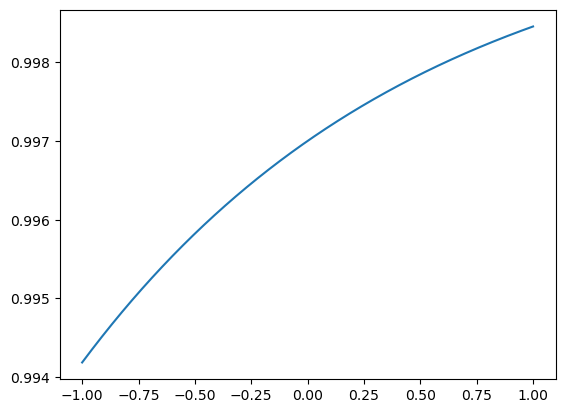

In [54]:
plt.plot(equidistant_val_array(-1, 1, 10001), gen_burgers_fisher_sol(
    -2, 0.0001, 2., t_max=5, n_pts=10001)[0])

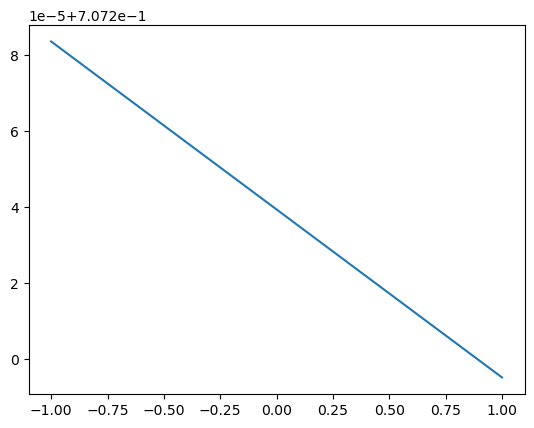

In [71]:
plt.plot(equidistant_val_array(-1, 1, 10001), res[4001])

In [9]:
# print(gen_burgers_fisher_sol(
#             0.0001, 0.001, t_max=50, n_pts=10000))

[[0.51249743 0.51249743 0.51249743 ... 0.51248494 0.51248494 0.51248494]]


In [56]:
np.savetxt(
    'gen-burgers-fisher-t5-small-out.csv',
    res,  # res.T,
    # header=','.join(["x", "y", "z"]),
    delimiter=',',
    # fmt='%.0f',
    comments='')

In [22]:
# del res